Loading Dataset and Preprocessing

In [2]:
import pandas as pd

data = pd.read_csv('Online Retail.csv')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
data.dropna(inplace = True)
data.drop_duplicates(subset = ['InvoiceNo', 'InvoiceDate'], keep = 'first', inplace = True)

In [4]:
q1 = data['Quantity'].quantile(0.25)
q3 = data['Quantity'].quantile(0.75)
iqr = q3 - q1
data = data[(data['Quantity'] >= q1 - 1.5 * iqr) & (data['Quantity'] <= q3 + 1.5 * iqr)]
data['Quantity'] = data['Quantity'].abs()
data['UnitPrice'] = data['UnitPrice'].abs()

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,20623.0,7.201183,6.990775,1.0,2.00,4.00,12.00,28.0
UnitPrice,20623.0,29.297642,485.932774,0.0,1.45,2.75,5.35,38970.0
CustomerID,20623.0,15236.928672,1654.673160,12347.0,13900.50,15287.00,16626.00,18287.0


Explorary Data Analysis

In [6]:
sales_by_product = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[ : 20]

sales_by_product

Description
REGENCY CAKESTAND 3 TIER              1365
RABBIT NIGHT LIGHT                    1136
WHITE HANGING HEART T-LIGHT HOLDER    1135
ASSORTED COLOUR BIRD ORNAMENT         1065
HEART OF WICKER SMALL                  745
PARTY BUNTING                          687
PAPER CHAIN KIT 50'S CHRISTMAS         644
LUNCH BAG RED RETROSPOT                622
CHILLI LIGHTS                          613
VICTORIAN GLASS HANGING T-LIGHT        584
ROSES REGENCY TEACUP AND SAUCER        568
SET OF 4 PANTRY JELLY MOULDS           562
Manual                                 546
STRAWBERRY CERAMIC TRINKET BOX         545
JAM MAKING SET PRINTED                 542
ASSORTED COLOURS SILK FAN              521
JUMBO BAG RED RETROSPOT                514
PACK OF 72 RETROSPOT CAKE CASES        491
JAM MAKING SET WITH JARS               487
DOORMAT KEEP CALM AND COME IN          486
Name: Quantity, dtype: int64

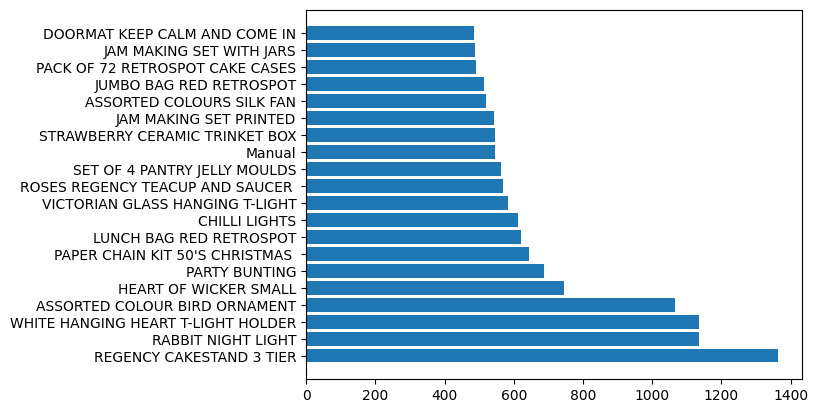

In [7]:
import matplotlib.pyplot as plt

plt.barh(sales_by_product.index, sales_by_product.values)
plt.show()

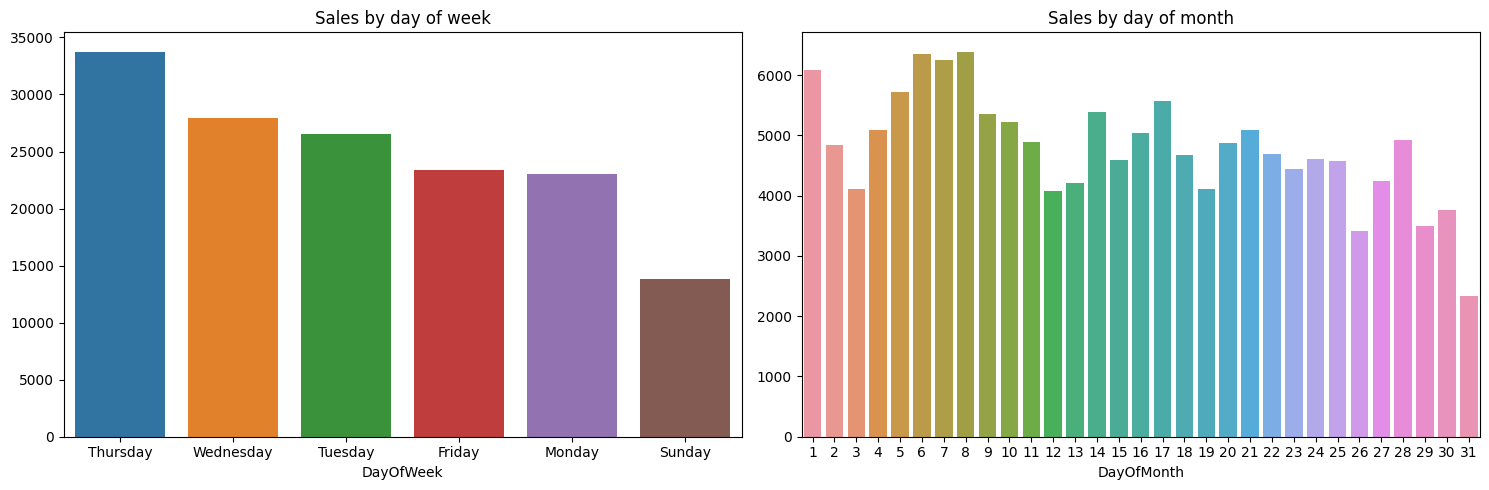

In [11]:
import seaborn as sns

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['DayOfMonth'] = data['InvoiceDate'].dt.day
sales_by_day_of_week = data.groupby('DayOfWeek')['Quantity'].sum().sort_values(ascending=False)
sales_by_day_of_month = data.groupby('DayOfMonth')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x = sales_by_day_of_week.index, y = sales_by_day_of_week.values)
plt.title('Sales by day of week')

plt.subplot(1, 2, 2)
sns.barplot(x = sales_by_day_of_month.index, y = sales_by_day_of_month.values)
plt.title('Sales by day of month')

plt.tight_layout()
plt.show()

Country
United Kingdom    131328
Germany             4411
France              3985
EIRE                2440
Belgium              877
Spain                838
Portugal             521
Netherlands          436
Switzerland          423
Australia            394
Name: Quantity, dtype: int64


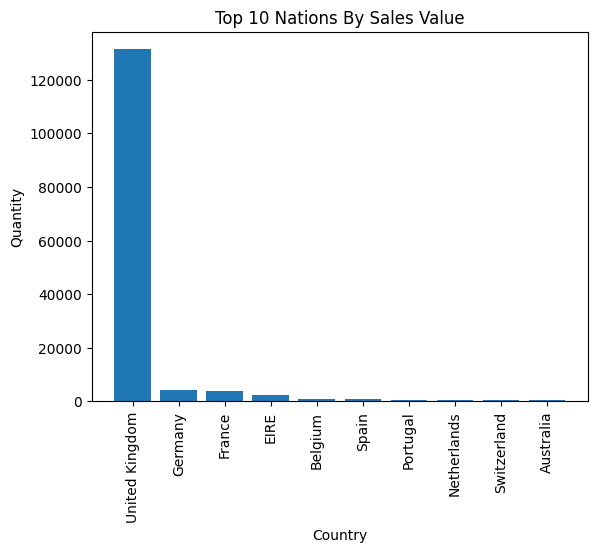

In [12]:
top_10_nations = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)[ : 10]

print(top_10_nations)

plt.bar(top_10_nations.index, top_10_nations.values)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 10 Nations By Sales Value')
plt.show()